# Soal 2 

### Film Bagus 

link: https://github.com/LintangWisesa/Ujian_MachineLearning_JCDS07 no. 3

<hr>

__SCREENSHOT SOAL__

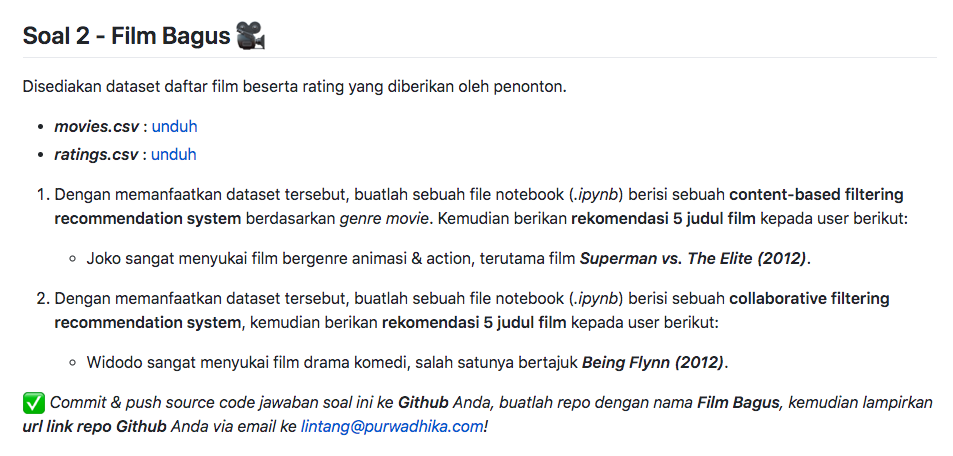

<hr>

### Content-Based Filtering Recommendation System

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dfmovie = pd.read_csv('./dataset/movies.csv') 

dfmovie.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
dfmovie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [4]:
IdJoko = dfmovie.loc[dfmovie['title'] == 'Superman vs. The Elite (2012)', 'movieId'].values[0]
IndexJoko = dfmovie.loc[dfmovie['title'] == 'Superman vs. The Elite (2012)', 'movieId'].index[0]

In [5]:
coVec = CountVectorizer()

In [6]:
dfSimilarity = pd.DataFrame()
for i in range (len(dfmovie)): 
    c = coVec.fit_transform([dfmovie.iloc[IndexJoko]['genres'], dfmovie.iloc[i]['genres']]) 
    mf = c.toarray() 
    similarityScore = cosine_similarity(mf) 
    similarityScoreDF = pd.DataFrame(similarityScore)  
    tes = similarityScoreDF[0][1]
    dfSimilarity = dfSimilarity.append([tes])

dfSimilarity.columns =['SimScore']
dfSimilarity = dfSimilarity.reset_index() 
print(dfSimilarity.head(5)) 

   index  SimScore
0      0  0.316228
1      0  0.000000
2      0  0.000000
3      0  0.000000
4      0  0.000000


In [45]:
dfSimilarity = dfSimilarity.sort_values(by='SimScore', ascending=False) 
list_index = list(dfSimilarity.iloc[:5].index)
list_index

if 9370 in list_index: 
    list_index.remove(9370) 
    list_index.append(dfSimilarity.iloc[6])
    
list_index

[9570, 10167, 10277, 6260, 8637]

In [47]:
list_movie = list(dfmovie.iloc[list_index]['title'])
list_movieID = list(dfmovie.iloc[list_index]['movieId'])

print("Rekomendasi Film:\n") 

for a in range(5):
    print(a+1, " ID = ", list_movieID[a], " | Title = ", list_movie[a])

Rekomendasi Film:

1  ID =  99813  | Title =  Batman: The Dark Knight Returns, Part 2 (2013)
2  ID =  124867  | Title =  Justice League: Throne of Atlantis (2015)
3  ID =  138104  | Title =  Justice League: Gods and Monsters (2015)
4  ID =  26913  | Title =  Street Fighter II: The Animated Movie (Sutorîto Faitâ II gekijô-ban) (1994)
5  ID =  79274  | Title =  Batman: Under the Red Hood (2010)


<hr> 

### Collaborative Filtering Recommendation System

In [9]:
dfrating = pd.read_csv('./dataset/ratings.csv') 
dfmovie = pd.read_csv('./dataset/movies.csv') 

dfrating.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [10]:
IdWidodo = dfmovie.loc[dfmovie['title'] == 'Being Flynn (2012)', 'movieId'].values[0]
IndexWidodo = dfmovie.loc[dfmovie['title'] == 'Being Flynn (2012)', 'movieId'].index[0]

In [11]:
dfrating2 = dfrating.pivot_table(
    index = 'userId', 
    columns = 'movieId'
)['rating']
dfrating2.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfrating2 = dfrating2.replace([np.NaN, -1], 0)
dfrating2.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
dfCorr = dfrating2.corr()
dfCorr.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.229124,0.222062,0.079319,0.243736,0.211601,0.237869,0.066370,0.026712,0.156136,...,0.053224,-0.027328,0.054386,-0.027328,0.026201,-0.027328,-0.027328,-0.027328,0.026451,-0.027328
2,0.229124,1.000000,0.108133,0.085610,0.123400,0.182489,0.111970,0.035200,0.043333,0.314376,...,0.082551,0.082551,0.035785,0.082551,0.115655,-0.015020,-0.015020,0.082551,0.081235,0.082551
3,0.222062,0.108133,1.000000,0.145779,0.469828,0.224401,0.281310,0.161308,0.188836,0.039788,...,-0.011447,-0.011447,0.032102,-0.011447,-0.016037,-0.011447,-0.011447,-0.011447,0.029735,-0.011447
4,0.079319,0.085610,0.145779,1.000000,0.095993,0.136973,0.067767,0.184446,0.006738,0.127035,...,-0.004763,-0.004763,-0.006649,-0.004763,-0.006673,-0.004763,-0.004763,-0.004763,-0.008250,-0.004763
5,0.243736,0.123400,0.469828,0.095993,1.000000,0.123640,0.366064,0.177667,0.086260,0.052069,...,-0.011947,-0.011947,0.040914,-0.011947,-0.016738,-0.011947,-0.011947,-0.011947,0.038672,-0.011947


In [14]:
widodo = [IdWidodo, 10] 

In [15]:
skor = dfCorr[widodo[0]] * widodo[1]  
skor

movieId
1         0.330857
2         0.825511
3         0.712159
4        -0.047633
5         0.870669
            ...   
146684   -0.014993
146878   -0.014993
148238   -0.014993
148626    5.978688
149532   -0.014993
Name: 95816, Length: 10325, dtype: float64

In [16]:
skor = skor.sort_values(ascending=False)
list_rekomen = list(skor[:5].index)
list_rekomen

[7086, 4801, 6898, 87660, 53038]

In [51]:
print('Rekomendasi Film: \n')
for i in list_rekomen: 
    print(dfmovie[dfmovie['movieId'] == i]['title'].values[0])

Rekomendasi Film: 

Pygmalion (1938)
Little Foxes, The (1941)
Sweet Sixteen (2002)
Too Big to Fail (2011)
Red Dust (1932)
